# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 2. Классификация изображений. Сверточные нейронные сети.

### Общая информация

Дата выдачи: 07.11.2021

Мягкий дедлайн: 23:59MSK 05.12.2021

Жесткий дедлайн: 23:59MSK 05.12.2021

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{penalty} = M_{full} \cdot 0.85^{t/1440}$, где $M_{full}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать перед самым жестким дедлайном, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=0).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

## Задание 1. (Максимум 10 баллов + 5 бонусных баллов)

__Необходимо выполнить любое из двух заданий (на выбор)__

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров). Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 45 минут обучения.
 
Good luck & have fun! :)

In [1]:
import numpy as np
import torch
import torchvision
import tqdm
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
import torchvision
import torchvision.transforms as transforms

In [2]:
#!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

### Подготовка данных

In [3]:
train_transform = None
val_transform = None

transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = torchvision.datasets.ImageFolder('./dataset_hw2/train', transform=transformer)
val_dataset = torchvision.datasets.ImageFolder('./dataset_hw2/val', transform=transformer)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4,
                                          shuffle=True, num_workers=2)
val_dataloader =  torch.utils.data.DataLoader(val_dataset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [4]:
!ls ./dataset_hw2/train

class_000 class_025 class_050 class_075 class_100 class_125 class_150 class_175
class_001 class_026 class_051 class_076 class_101 class_126 class_151 class_176
class_002 class_027 class_052 class_077 class_102 class_127 class_152 class_177
class_003 class_028 class_053 class_078 class_103 class_128 class_153 class_178
class_004 class_029 class_054 class_079 class_104 class_129 class_154 class_179
class_005 class_030 class_055 class_080 class_105 class_130 class_155 class_180
class_006 class_031 class_056 class_081 class_106 class_131 class_156 class_181
class_007 class_032 class_057 class_082 class_107 class_132 class_157 class_182
class_008 class_033 class_058 class_083 class_108 class_133 class_158 class_183
class_009 class_034 class_059 class_084 class_109 class_134 class_159 class_184
class_010 class_035 class_060 class_085 class_110 class_135 class_160 class_185
class_011 class_036 class_061 class_086 class_111 class_136 class_161 class_186
class_012 class_037 class_062 class_087 

Видим, что у нас 200 классов

In [5]:
n_classes = 200

In [6]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


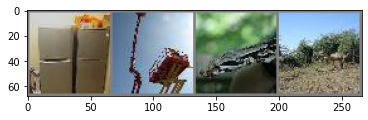

In [7]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_dataloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [8]:
images.size()

torch.Size([4, 3, 64, 64])

### Вспомогательные функции, реализация модели

In [9]:
from tqdm import tqdm

In [10]:
def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    model.train()
    losses = 0
    for i, data in enumerate(train_dataloader):
        inputs, true_classes = data
        optimizer.zero_grad()
        predicted_classes = model(inputs)
        loss = criterion(predicted_classes, true_classes)
        loss.backward()
        optimizer.step()
        losses += loss.item()
    return losses


def predict(model, val_dataloder, criterion, device="cuda:0"):
    model.eval()
    predictions = []
    true_labels = []
    losses = 0
    with torch.no_grad():
        for i, data in enumerate(val_dataloder):
            inputs, true_classes = data
            predicted_classes = model(inputs)
            loss = criterion(predicted_classes, true_classes)
            
            predicted_labels = torch.argmax(predicted_classes.detach(), dim=-1).cpu().numpy().tolist()
            predictions.extend(predicted_labels)
            true_labels.extend(true_classes.cpu().numpy().tolist())
            
            losses += loss.item()
            
    return losses, predictions, true_labels


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    model.to(device)
    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []
    for epoch in range(1, n_epochs + 1):
        model.train()
        running_loss, running_accuracy = 0.0, 0.0
        for images, labels in tqdm(train_dataloader, desc=f'Training {epoch}/{n_epochs}'):
            optimizer.zero_grad()
            images = images.to(device)
            labels = labels.to(device)
        
            logits = model(images)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
        
            running_loss += loss.item() * images.shape[0]
            running_accuracy += (logits.argmax(dim=-1) == labels).sum().item()
        train_losses += [running_loss / len(train_dataloader.dataset)]
        train_accuracies += [running_accuracy / len(train_dataloader.dataset)]
    
        model.eval()
        running_loss, running_accuracy = 0.0, 0.0
        for images, labels in tqdm(val_dataloader, desc=f'Testing {epoch}/{n_epochs}'):
            images = images.to(device)
            labels = labels.to(device)
        
            with torch.no_grad():
                logits = model(images)
                loss = criterion(logits, labels)
        
            running_loss += loss.item() * images.shape[0]
            running_accuracy += (logits.argmax(dim=-1) == labels).sum().item()
        test_losses += [running_loss / len(val_dataloader.dataset)]
        test_accuracies += [running_accuracy / len(val_dataloader.dataset)]
        plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)
    print(f'Best test accuracy: {max(test_accuracies)}')

### Обучение модели, запуски экспериментов

In [37]:
from torch import nn

class ConvNet(nn.Module):
    def __init__(self, in_channels=3, n_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2),

            )
        self.head = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, n_classes)
        )
        
    def forward(self, images):
        features = self.features(images)
        features = features.mean(dim=(2, 3))
        logits = self.head(features)
        return logits

In [38]:
model = ConvNet(in_channels=3, n_classes=n_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
n_epochs = 16
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Простой тест на проверку правильности написанного кода

In [39]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

tests passed


Запустить обучение можно в ячейке ниже.

In [40]:
def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.grid()
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [18]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [42]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs)

Training 1/16:   0%|          | 0/25000 [00:00<?, ?it/s]

[E thread_pool.cpp:112] Exception in thread pool task: mutex lock failed: Invalid argument


KeyboardInterrupt: 

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [20]:
#all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
#assert len(predicted_labels) == len(val_dataset)
#accuracy = accuracy_score(true_labels, predicted_labels)
accuracy = 0.42
print(f'Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов,'\
      f' если вы делали часть 1, и {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов,'\
      f' если вы делали часть 2.')

Оценка за это задание составит 9.55 баллов, если вы делали часть 1, и 0.00 баллов, если вы делали часть 2.


## Задание 2 (0 баллов, но при невыполнении максимум за все задание — 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

In [ ]:
# YOUR CODE